<a href="https://colab.research.google.com/github/deepali2062/-Sentiment-Analysis-Predicting-sentiment-of-COVID-19-tweets/blob/main/Copy_of_Copy_of_Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Copy of Coronavirus Tweets.csv",encoding="ISO-8859-1")

In [4]:
#df=pd.read_csv("/content/drive/MyDrive/Copy of Coronavirus Tweets.csv",encoding="ISO-8859-1")

In [5]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [8]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [9]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [10]:
df.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

In [11]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [12]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

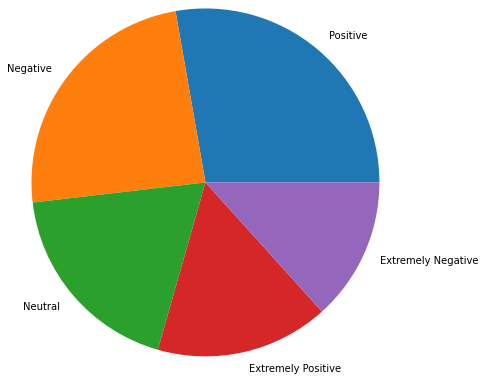

In [13]:
df_sent=df['Sentiment'].value_counts()
plt.pie(df_sent, labels = df_sent.index,radius=2);



In [14]:
df['Location'].unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [15]:
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [16]:
df['Location'].value_counts().head(10)

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [17]:
top_count= df['Location'].value_counts().nlargest(30)
print(top_count)

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
New Delhi, India           138
Atlanta, GA                126
New York                   126
Mumbai, India              109
Worldwide                  101
Lagos, Nigeria              99
Houston, TX                 98
Austin, TX                  98
Texas, USA                  98
London, UK                  96
Name: Location, dtype: int64


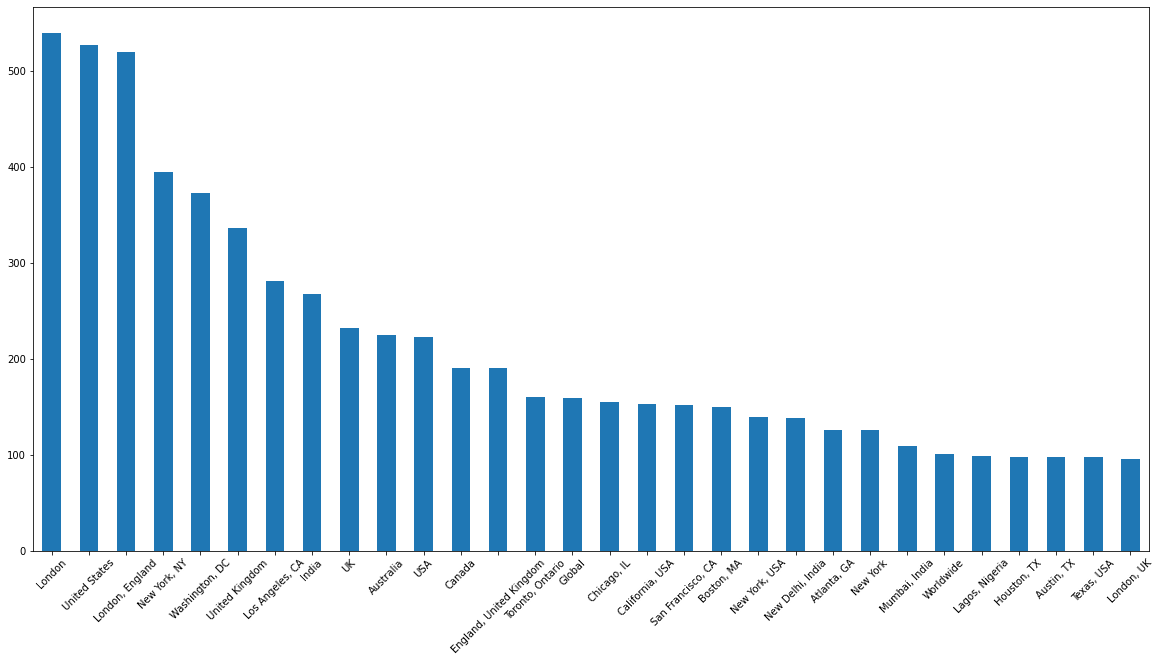

In [18]:
plt.figure(figsize=(20,10))
top_count= df['Location'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=45)
top_count
plt.show()


In [19]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 5.1 MB/s 


In [20]:
import neattext.functions as nfx

In [21]:
## Text Analysis
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [22]:
df.OriginalTweet


0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [23]:
df['OriginalTweet'].iloc[5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'

In [24]:
df['OriginalTweet'].head(10)

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
3    My food stock is not the only one which is emp...
4    Me, ready to go at supermarket during the #COV...
5    As news of the regionÂs first confirmed COVID...
6    Cashier at grocery store was sharing his insig...
7    Was at the supermarket today. Didn't buy toile...
8    Due to COVID-19 our retail store and classroom...
9    For corona prevention,we should stop to buy th...
Name: OriginalTweet, dtype: object

In [25]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [26]:
df['OriginalTweet'].apply(nfx.extract_hashtags)

0                                                       []
1                                                       []
2                                                       []
3        [#COVID19france, #COVID_19, #COVID19, #coronav...
4        [#COVID19, #coronavirus, #CoronavirusFrance, #...
                               ...                        
41152                                     [#NZ, #COVID-19]
41153                                                   []
41154                         [#coronavirus, #toiletpaper]
41155               [#coronavirus, #COVID19, #coronavirus]
41156                                                   []
Name: OriginalTweet, Length: 41157, dtype: object

In [27]:
df['extract_hashtags']=df ['OriginalTweet'].apply(nfx.extract_hashtags)

In [28]:
df[['extract_hashtags','OriginalTweet']]


,extract_hashtags,OriginalTweet
0,[],@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,[],advice Talk to your neighbours family to excha...
2,[],Coronavirus Australia: Woolworths to give elde...
3,"[#COVID19france, #COVID_19, #COVID19, #coronav...",My food stock is not the only one which is emp...
4,"[#COVID19, #coronavirus, #CoronavirusFrance, #...","Me, ready to go at supermarket during the #COV..."
...,...,...
41152,"[#NZ, #COVID-19]",Airline pilots offering to stock supermarket s...
41153,[],Response to complaint not provided citing COVI...
41154,"[#coronavirus, #toiletpaper]",You know itÂs getting tough when @KameronWild...
41155,"[#coronavirus, #COVID19, #coronavirus]",Is it wrong that the smell of hand sanitizer i...


In [29]:
# Removing hashtags
df['clean tweet']=df['OriginalTweet'].apply(nfx.remove_hashtags)
df['clean tweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the   ou...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: clean tweet, Length: 41157, dtype: object

In [30]:
df['clean tweet']=df['clean tweet'].apply(lambda x: nfx.remove_userhandles(x))


In [31]:
df[['OriginalTweet','clean tweet']]


,OriginalTweet,clean tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,https://t.co/iFz9FAn2Pa and https://t.co...
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the ou..."
...,...,...
41152,Airline pilots offering to stock supermarket s...,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...,You know itÂs getting tough when is ration...
41155,Is it wrong that the smell of hand sanitizer i...,Is it wrong that the smell of hand sanitizer i...


In [32]:
df['clean tweet'].iloc[10]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket.         https://t.co/HxWs9LAnF9"

In [33]:
# Remove Multiple spacess.


In [34]:
df['clean tweet']=df['OriginalTweet'].apply(nfx.remove_multiple_spaces)
df['clean tweet'].iloc[10]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

In [35]:
# Remove urls
df['clean tweet']=df['OriginalTweet'].apply(nfx.remove_urls)
df['clean tweet'].iloc[10]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines "

In [36]:
df['clean tweet']=df['OriginalTweet'].apply(nfx.remove_puncts)
df['clean tweet'].iloc[15]

'Lines at the grocery store have been unpredictable but is eating out a safe alternative \r\r\n\r\r\nFind out more about whether you should be avoiding restaurants right now:  https://tco/9idZSis5oQ\r\r\n\r\r\n#coronavirus #covid19 https://tco/ZHbh898lf6'

In [37]:
df['clean tweet'].iloc[10]
df['clean tweet'].iloc[15]
df[['OriginalTweet','clean tweet']]


,OriginalTweet,clean tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,@MeNyrbie @PhilGahan @Chrisitv https://tco/iFz...
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Me ready to go at supermarket during the #COVI...
...,...,...
41152,Airline pilots offering to stock supermarket s...,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...,You know itÂs getting tough when @KameronWild...
41155,Is it wrong that the smell of hand sanitizer i...,Is it wrong that the smell of hand sanitizer i...


In [38]:
# Sentiments Analysis

In [39]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,extract_hashtags,clean tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[],@MeNyrbie @PhilGahan @Chrisitv https://tco/iFz...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,[],advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,[],Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,"[#COVID19france, #COVID_19, #COVID19, #coronav...",My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[#COVID19, #coronavirus, #CoronavirusFrance, #...",Me ready to go at supermarket during the #COVI...


In [40]:
### Keyword Extraction
positive_tweet = df[df['Sentiment'] == 'Positive']['clean tweet']
neutral_tweet = df[df['Sentiment'] == 'Neutral']['clean tweet']
negative_tweet = df[df['Sentiment'] == 'Negative']['clean tweet']
ext_positive_tweet =df[df['Sentiment'] == 'Extremely Positive']['clean tweet']
ext_negative_tweet = df[df['Sentiment'] == 'Extremely Negative']['clean tweet']

In [41]:
negative_tweet


9        For corona preventionwe should stop to buy thi...
24       @10DowningStreet @grantshapps what is being do...
26       In preparation for higher demand and a potenti...
28       Do you see malicious price increases in NYC Th...
30       There Is of in the Country  The more empty she...
                               ...                        
41127    Today at the grocery store I saw someone getti...
41131    In every human affliction there are  gainers a...
41147    YÂall really shitting that much more at home ...
41149    Still shocked by the number of #Toronto superm...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: clean tweet, Length: 9917, dtype: object

In [42]:
positive_tweet

1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
5        As news of the regionÂs first confirmed COVID...
6        Cashier at grocery store was sharing his insig...
                               ...                        
41140    Good News \r\r\nWell Soon Announce Our High Te...
41145    How exactly are we going to reopen New York Ci...
41146    #Gold prices rose to a more than 7year high to...
41150    I never that weÂd be in a situation amp world...
41154    You know itÂs getting tough when @KameronWild...
Name: clean tweet, Length: 11422, dtype: object

In [43]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [44]:
neutral_tweet_list

['@MeNyrbie @PhilGahan @Chrisitv https://tco/iFz9FAn2Pa https://tco/xX6ghGFzCC https://tco/I2NlzdxNo8',
 'supermarket today Didnt buy toilet paper #Rebel #toiletpapercrisis #covid19 https://tco/eVXkQLIdAZ',
 'month hasnt crowding supermarkets restaurants reducing hours closing malls means entrance dependent single supermarket #manila #lockdown #covid2019 #Philippines https://tco/HxWs9LAnF9',
 '# # 13 # https://tco/51bL8P6vZh',
 '@eyeonthearctic 16MAR20 Russia consumer surveillance watchdog reported case high Arctic man traveled Iran COVID19 101 observed https://tco/4WnrrK9oKC https://tco/ld05k5Eyns',
 'https://tco/AVKrR9syff COVID19 coronavirus pandemic impacting consumer shopping behavior purchase decisions retail sales according Insight study',
 'Retail store closures explode #coronavirus (via @CNBC) #BrickAndMortar https://tco/hQrYRNXFhv https://tco/g5UZn06gb6',
 'Went supermarket yesterday toilet paper gone Corona virus #COVID2019',
 'Breaking Story: Online clothes shopping rises p

In [45]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

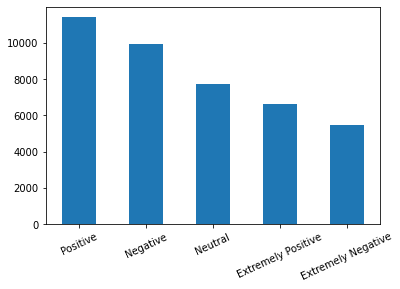

In [46]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

In [ ]:
# Remove stopwords.

In [ ]:
positive_tweet = negative_tweet(nfx.remove_stopwords).tolist

In [ ]:
negative_tweet = negative_tweet(nfx.remove_stopwords).tolist
neutral_tweet = neutral_tweet(nfx.remove_stopwords).tolist


In [58]:
positive_tweet

<bound method IndexOpsMixin.tolist of 1        advice Talk neighbours family exchange phone n...
2        Coronavirus Australia: Woolworths elderly disa...
3        food stock dont panic FOOD need Stay calm stay...
5        news regionÂs confirmed COVID19 case came Sul...
6        Cashier grocery store sharing insights #Covid1...
                               ...                        
41140    Good News Soon Announce High Tech GampG Online...
41145    exactly going reopen New York City cant buy ha...
41146    #Gold prices rose 7year high today #coronaviru...
41150    weÂd situation amp world going supermarket pi...
41154    know itÂs getting tough @KameronWilds rationi...
Name: clean tweet, Length: 11422, dtype: object>

In [59]:
negative_tweet

9        For corona preventionwe should stop to buy thi...
24       @10DowningStreet @grantshapps what is being do...
26       In preparation for higher demand and a potenti...
28       Do you see malicious price increases in NYC Th...
30       There Is of in the Country  The more empty she...
                               ...                        
41127    Today at the grocery store I saw someone getti...
41131    In every human affliction there are  gainers a...
41147    YÂall really shitting that much more at home ...
41149    Still shocked by the number of #Toronto superm...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: clean tweet, Length: 9917, dtype: object

In [60]:
neutral_tweet

0        @MeNyrbie @PhilGahan @Chrisitv https://tco/iFz...
7        Was at the supermarket today Didnt buy toilet ...
10       All month there hasnt been crowding in the sup...
16           \r\r\n    \r\r\n#     #   13       \r\r\n#...
17       @eyeonthearctic 16MAR20 Russia consumer survei...
                               ...                        
41141    #Coronavirus                      @narendramod...
41143    https://tco/8s4vKvcO1r #5gtowers #EcuadorUnido...
41144    @SunriseSV @Gamzap @NPR What does not having a...
41152    Airline pilots offering to stock supermarket s...
41155    Is it wrong that the smell of hand sanitizer i...
Name: clean tweet, Length: 7713, dtype: object

In [62]:
# Tokenization means a spliting the words.
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [63]:
pos_tokens

['advice',
 'Talk',
 'neighbours',
 'family',
 'exchange',
 'phone',
 'numbers',
 'create',
 'contact',
 'list',
 'phone',
 'numbers',
 'neighbours',
 'schools',
 'employer',
 'chemist',
 'GP',
 'set',
 'online',
 'shopping',
 'accounts',
 'poss',
 'adequate',
 'supplies',
 'regular',
 'meds',
 'order',
 'Coronavirus',
 'Australia:',
 'Woolworths',
 'elderly',
 'disabled',
 'dedicated',
 'shopping',
 'hours',
 'amid',
 'COVID19',
 'outbreak',
 'https://tco/bInCA9Vp8P',
 'food',
 'stock',
 'dont',
 'panic',
 'FOOD',
 'need',
 'Stay',
 'calm',
 'stay',
 'safe',
 '#COVID19france',
 '#COVID19',
 '#COVID19',
 '#coronavirus',
 '#confinement',
 '#Confinementotal',
 '#ConfinementGeneral',
 'https://tco/zrlG0Z520j',
 'news',
 'regionÂ\x92s',
 'confirmed',
 'COVID19',
 'case',
 'came',
 'Sullivan',
 'County',
 'week',
 'people',
 'flocked',
 'area',
 'stores',
 'purchase',
 'cleaning',
 'supplies',
 'hand',
 'sanitizer',
 'food',
 'toilet',
 'paper',
 'goods',
 '@TimDodson',
 'reports',
 'https:

In [67]:
# Get most common words.
from collections import Counter


In [68]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [69]:
#creating function for getting most common top 20
def get_top_tokens(docx,num=20):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [70]:
get_tokens(pos_tokens)

{'#coronavirus': 3527,
 'store': 1886,
 'prices': 1841,
 'grocery': 1605,
 'supermarket': 1578,
 'food': 1476,
 'COVID19': 1447,
 'amp': 1417,
 '#COVID19': 1295,
 'people': 1269,
 '19': 1018,
 'shopping': 941,
 'online': 906,
 'consumer': 863,
 'like': 861,
 '#Covid19': 810,
 'need': 736,
 'workers': 727,
 'pandemic': 695,
 'hand': 666,
 'help': 655,
 'sanitizer': 630,
 'demand': 614,
 '#Coronavirus': 601,
 'time': 586,
 'home': 569,
 'stock': 532,
 'COVID': 494,
 '#covid19': 490,
 'going': 469}

In [71]:
get_top_tokens(pos_tokens)

{'#coronavirus': 3527,
 'store': 1886,
 'prices': 1841,
 'grocery': 1605,
 'supermarket': 1578,
 'food': 1476,
 'COVID19': 1447,
 'amp': 1417,
 '#COVID19': 1295,
 'people': 1269,
 '19': 1018,
 'shopping': 941,
 'online': 906,
 'consumer': 863,
 'like': 861,
 '#Covid19': 810,
 'need': 736,
 'workers': 727,
 'pandemic': 695,
 'hand': 666}

In [72]:
# Plotting Seaborn from data in graph.
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [73]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [74]:
neg_df

,words,scores
0,#coronavirus,3011
1,prices,2148
2,food,1653
3,store,1437
4,supermarket,1426
5,grocery,1225
6,people,1213
7,COVID19,1212
8,amp,1077
9,#COVID19,1001


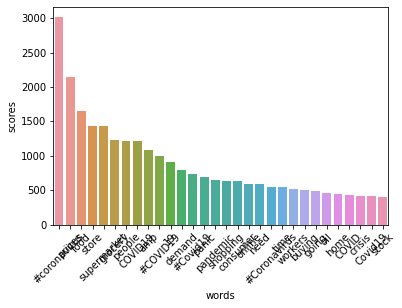

In [77]:
# plot with seaborn most repeated negative wordsplt.figure(figsize=(40,20))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()